In [1]:
import os
import numpy as np
import pandas as pd

os.chdir('../../Data/')

dc = pd.read_csv('3_outputs/id_analysis_data_cube.csv')

dc.head()

,Unnamed: 0,State,Postcode,Year,Fuel Type,LVs,VWs,RYIs,Latitude,Longitude
0,0,NT,800,2020,ICE,6780,0.0,0.0,-12.4626,130.8428
1,1,NT,800,2020,BEV,3,0.0,0.0,-12.4626,130.8428
2,2,NT,800,2020,HFCEV,0,0.0,0.0,-12.4626,130.8428
3,3,NT,800,2020,Hybrid/PHEV,131,0.0,0.0,-12.4626,130.8428
4,4,NT,810,2020,ICE,21870,0.0,0.0,-12.3661,130.8784


In [12]:
# Set criteria for vw owners
y2023 = dc['Year'] == 2023
ice = dc['Fuel Type'] == 'ICE'
bev = dc['Fuel Type'] == 'BEV'

owners = dc.loc[y2023 & ice]['VWs'].fillna(0)
evs = dc[y2023 & bev]['LVs'].fillna(0)
ryis = dc.loc[(y2023 & bev),['RYIs']].fillna(0)

print(ryis.head())

           RYIs
39555  1.098612
39556  1.609438
39557  0.693147
39558  0.693147
39559  0.000000


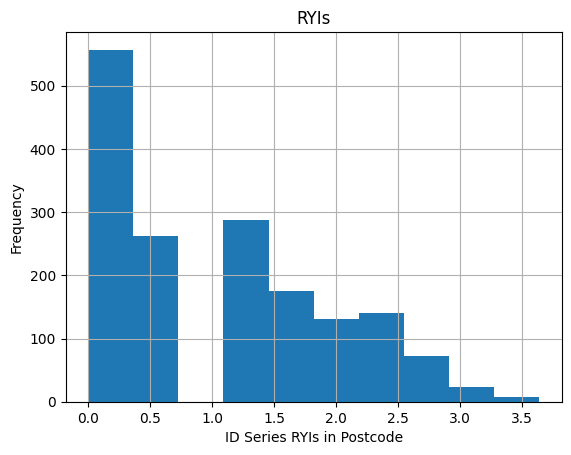

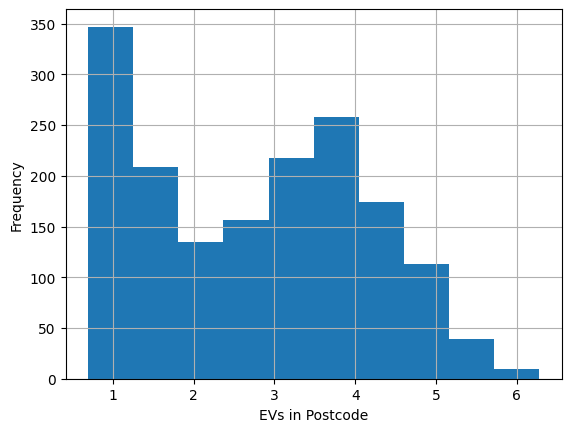

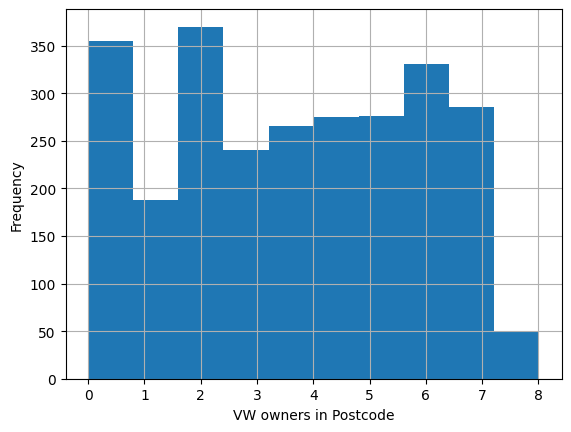

           RYIs
39555  1.098612
39556  1.609438
39557  0.693147
39558  0.693147
39559  0.000000
...         ...
41209  0.000000
41210  0.000000
41211  0.000000
41212  0.000000
41213  0.000000

[1659 rows x 1 columns]


In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

ryi_log = np.log(ryis+1)
evs_log = np.log(evs+1)
owners_log = np.log(owners+1)

ryi_log.hist()
plt.xlabel('ID Series RYIs in Postcode')
plt.ylabel('Frequency')
plt.show()

evs_log.hist()
plt.xlabel('EVs in Postcode')
plt.ylabel('Frequency')
plt.show()

owners_log.hist()
plt.xlabel('VW owners in Postcode')
plt.ylabel('Frequency')
plt.show()

print(ryi_log)

[[ 0.07195516]
 [ 0.62326873]
 [-0.36564703]
 ...
 [-1.11373293]
 [-1.11373293]
 [-1.11373293]]


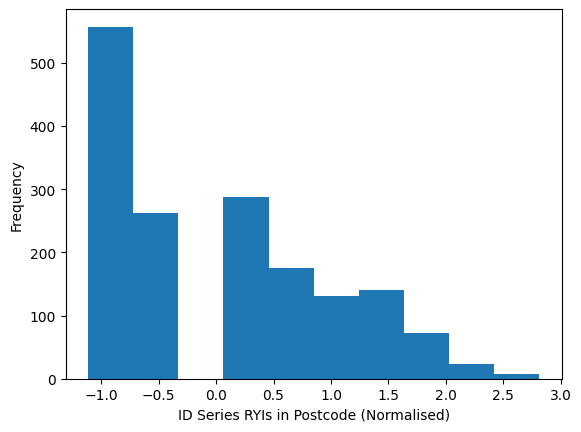

8.565916042918628e-17
1.0


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ryi_norm = scaler.fit_transform(ryi_log)
print(ryi_norm)
plt.hist(ryi_norm)
plt.xlabel('ID Series RYIs in Postcode (Normalised)')
plt.ylabel('Frequency')
plt.show()

